In [1]:
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

Будем работать с классическим датасетом о вине.  
Скачать данные файлом, если очень хочется, можно тут: [ссылка](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data).  

У нас есть различные числовые данные о трёх видах вина. Вообще, это хороша задача для тренировки классификации объектов. Но мы пока зайдем с другой стороны:
- нам известно, к какому классу относится каждая запись
- проведем описательный анализ

In [4]:
# для загрузки мы пользуемся библиотекой для классического ML - scikit-learn
# загружается отдельно матрица с признаками (features) и целевой столбец (target)
df, target = datasets.load_wine(return_X_y=True, as_frame=True) 

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [7]:
target.unique() # это лейблы. здесь всего 3 вида вина.

array([0, 1, 2])

In [8]:
# добавим целевой столбец в наш датафрейм
df['class'] = target
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [9]:
df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

# группировка
## Определить среднее значение в каждом классе для каждого класса вина.

Пример на ирисах Фишера. Мы тоже с ними поработаем, но потом :)  
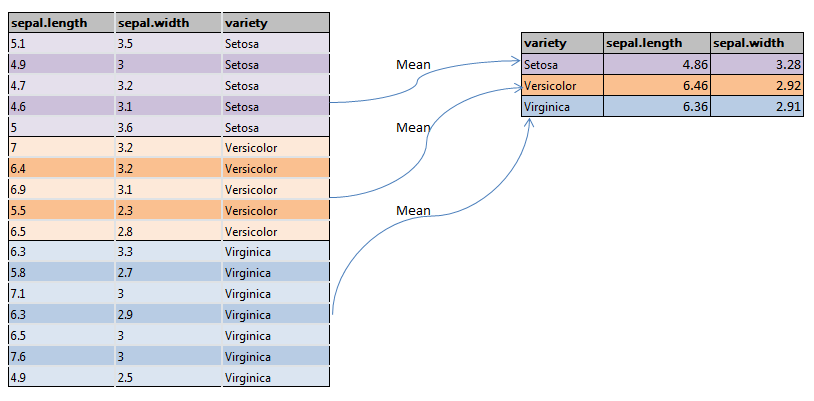

In [10]:
# группировка
print(df.groupby('class'))

In [11]:
# подсчет числа непустых строк для каждого столбца внутри каждй группы
df.groupby('class').count()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59
1,71,71,71,71,71,71,71,71,71,71,71,71,71
2,48,48,48,48,48,48,48,48,48,48,48,48,48


In [12]:
df.groupby(by='class')['flavanoids'].mean()

class
0    2.982373
1    2.080845
2    0.781458
Name: flavanoids, dtype: float64

In [13]:
df['flavanoids'].mean()

2.0292696629213487

In [14]:
df.groupby(by='class')['flavanoids'].mean()

class
0    2.982373
1    2.080845
2    0.781458
Name: flavanoids, dtype: float64

In [15]:
# посмотрим на атрибут groups объекта DataFrameGroupBy 
df.groupby('class').groups

# какой тип данных мы получили?

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], 1: [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 2: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]}

In [16]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [17]:
sample = df.sample(n=100).reset_index()
sample

,index,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0
1,88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0,1
2,66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,1
3,19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
4,29,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1
96,7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
97,110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
98,55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0


In [18]:
sample.groupby('class').groups

{0: [0, 3, 4, 7, 8, 11, 14, 16, 21, 24, 25, 27, 31, 32, 47, 48, 54, 56, 61, 62, 65, 69, 71, 72, 73, 74, 75, 78, 79, 80, 96, 98, 99], 1: [1, 2, 6, 9, 10, 17, 18, 19, 20, 28, 29, 30, 34, 35, 38, 39, 40, 42, 43, 44, 46, 51, 55, 57, 58, 59, 64, 76, 81, 83, 84, 85, 86, 87, 89, 90, 92, 94, 95, 97], 2: [5, 12, 13, 15, 22, 23, 26, 33, 36, 37, 41, 45, 49, 50, 52, 53, 60, 63, 66, 67, 68, 70, 77, 82, 88, 91, 93]}

In [19]:
## получить отдельную группы
df.groupby('class').get_group(1).head(5) # get_group(ключ)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1


## АЛГОРИТМ РАБОТЫ
1. Разбиение данных на группы
2. Выполнение операции отдельно к каждой группе
3. Соединение результатов в одну конечную структуру

### Работа без группировки (будет считать среднее для столбца `alcohol`)

In [20]:
avg = {}

for wine_class in df['class'].unique(): # пройдемся по всем классам
    
    df_temp = df[df['class'] == wine_class] # отберем строки относящиеся к этому классу
    
    avg_val = df_temp['alcohol'].mean()
    
    avg[wine_class] = avg_val
    
print(avg)

{0: 13.744745762711865, 1: 12.278732394366195, 2: 13.153750000000002}


In [21]:
avg_df = pd.DataFrame.from_dict(avg, orient='index', columns=['avg_alcohol'])
avg_df

,avg_alcohol
0,13.744746
1,12.278732
2,13.153750


Можно и без группировки. Но кода больше. И это был лишь простой запрос.  
Как надо:

In [22]:
df[df['class'] == 0]['alcohol'].mean()

13.744745762711865

In [23]:
dfg = df.groupby('class')
dfg['alcohol'].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [24]:
df.groupby('class')[['alcohol', 'flavanoids']].mean() # или если хотим датафрейм

,alcohol,flavanoids
class,,
0,13.744746,2.982373
1,12.278732,2.080845
2,13.153750,0.781458


## Базовые функции для агрегирования:
- `.count()`
- `.sum()`
- `.mean()`
- `.median()`
- `.min()`
- `.max()`
- `.std()`
- `.var()`

### Посчитаем минимум и максимум для столбца `total_phenols` по классам

In [25]:
a = df.groupby('class')['total_phenols'].min()
a

class
0    2.20
1    1.10
2    0.98
Name: total_phenols, dtype: float64

In [26]:
b = df.groupby('class')['total_phenols'].max()
b

class
0    3.88
1    3.52
2    2.80
Name: total_phenols, dtype: float64

In [27]:
pd.DataFrame(data={'min':a, 'max':b})

,min,max
class,,
0,2.20,3.88
1,1.10,3.52
2,0.98,2.80


In [28]:
# Применение нескольких функций сразу:
res = df.groupby('class')['total_phenols'].agg([np.min, np.max, np.mean])
res

,amin,amax,mean
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [29]:
# способ переименовать колонки -- переименовать целиком атрибут
res.columns = ['минимум', 'максимум', 'среднее']
res

,минимум,максимум,среднее
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [30]:
# или таргетное одну колонку или несколько
res = res.rename(columns={"минимум" : "МиНиМуМммммм"})
res

,МиНиМуМммммм,максимум,среднее
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [31]:
def razmah(x):
    return x.max() - x.min()

In [32]:
res = df.groupby('class')['total_phenols'].agg(Минимум=np.min, 
                                               Максимум=np.max, 
                                               Среднее=np.mean,
                                               Размах=razmah
                                               # Размах=lambda x: x.max() - x.min()
                                              )
res

,Минимум,Максимум,Среднее,Размах
class,,,,
0,2.20,3.88,2.840169,1.68
1,1.10,3.52,2.258873,2.42
2,0.98,2.80,1.678750,1.82


In [33]:
res = df.groupby('class').agg({'total_phenols':[np.min, np.max], 'alcohol':[np.mean]})
res

total_phenols          alcohol
               amin  amax       mean
class                               
0              2.20  3.88  13.744746
1              1.10  3.52  12.278732
2              0.98  2.80  13.153750

## кастомная функция для агрегирования

In [34]:
df['alcohol'].apply(lambda x : x ** 2 - 3)

0      199.4929
1      171.2400
2      170.1856
3      203.4969
4      172.2976
         ...   
173    184.9641
174    176.5600
175    173.0929
176    170.4489
177    196.6569
Name: alcohol, Length: 178, dtype: float64

In [35]:
df['alcohol'] ** 2 - 3

0      199.4929
1      171.2400
2      170.1856
3      203.4969
4      172.2976
         ...   
173    184.9641
174    176.5600
175    173.0929
176    170.4489
177    196.6569
Name: alcohol, Length: 178, dtype: float64

In [36]:
# применять агрегирующие функции через apply не надо, их можно и так применить, без apply
df.groupby('class')['alcohol'].apply(np.mean)  # == df.groupby('class')['alcohol'].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [37]:
# посчитаем range
df.groupby('class')['alcohol'].apply(lambda x: x.max() - x.min())

class
0    1.98
1    2.83
2    2.14
Name: alcohol, dtype: float64

In [38]:
# через agg можно указать много функций 
df.groupby('class')['alcohol'].agg(minimum=np.min,
                                   maximum=np.max,
                                   minmax_range=lambda x: x.max() - x.min(),
                                   q5 = lambda x: x.quantile(0.05),
                                   q95 = lambda x: x.quantile(0.95))

,minimum,maximum,minmax_range,q5,q95
class,,,,,
0,12.85,14.83,1.98,13.0500,14.3810
1,11.03,13.86,2.83,11.5100,13.2250
2,12.20,14.34,2.14,12.2885,14.0425


## apply VS transform

### apply 
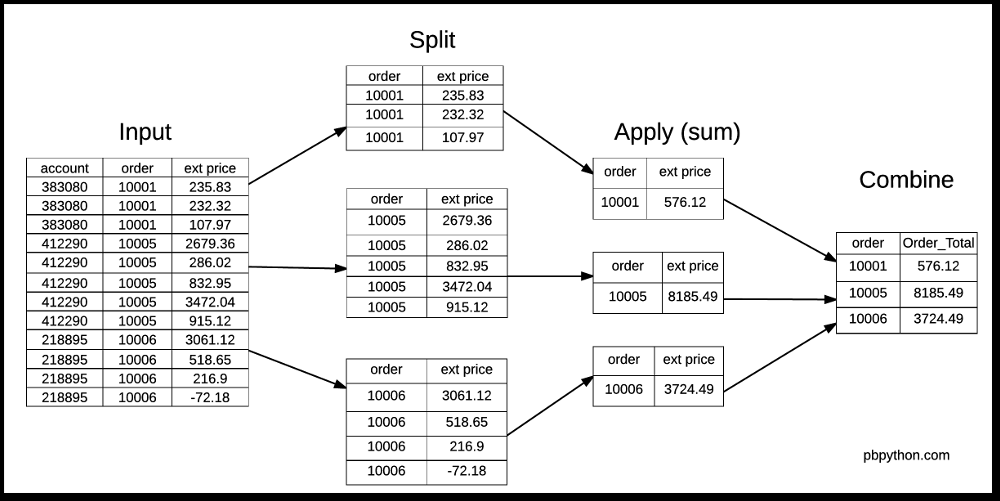

## transform
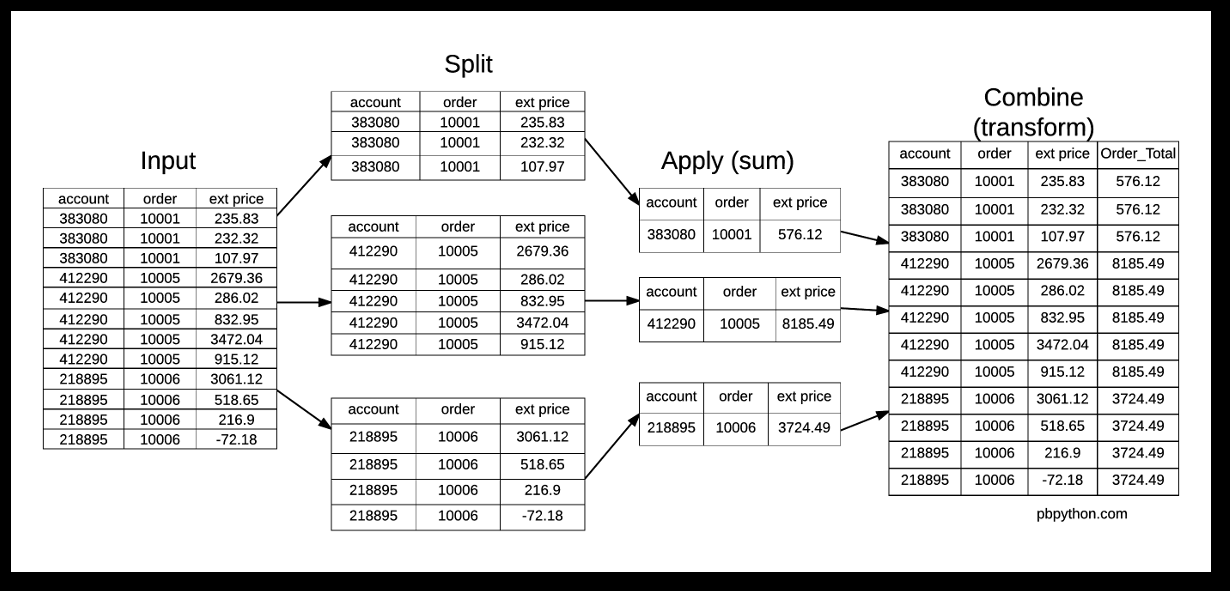

In [39]:
# создаёт колонку такой же размерности, как исходный датафрейм
df.groupby('class')['alcohol'].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [40]:
df.groupby('class')['alcohol'].transform('mean')

0      13.744746
1      13.744746
2      13.744746
3      13.744746
4      13.744746
         ...    
173    13.153750
174    13.153750
175    13.153750
176    13.153750
177    13.153750
Name: alcohol, Length: 178, dtype: float64

In [41]:
# создаёт колонку такой же размерности, как исходный датафрейм
df['alcohol_group_mean'] = df.groupby('class')['alcohol'].transform(np.mean)
df.sample(n=30)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.600000,1.15,2.90,1320.0,0,13.744746
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.600000,0.59,1.30,500.0,2,13.153750
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0,13.744746
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.000000,0.57,1.96,660.0,2,13.153750
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.000000,0.90,2.78,325.0,1,12.278732
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695.0,2,13.153750
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.930000,1.09,3.63,1015.0,0,13.744746
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.520000,0.56,1.51,675.0,2,13.153750
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.600000,1.19,2.30,678.0,1,12.278732
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.280000,0.91,3.00,1035.0,0,13.744746


In [42]:
df['alcohol_pct_of_mean'] = ((df['alcohol'] / df['alcohol_group_mean']) * 100).round(1)

<Axes: xlabel='class', ylabel='alcohol_pct_of_mean'>

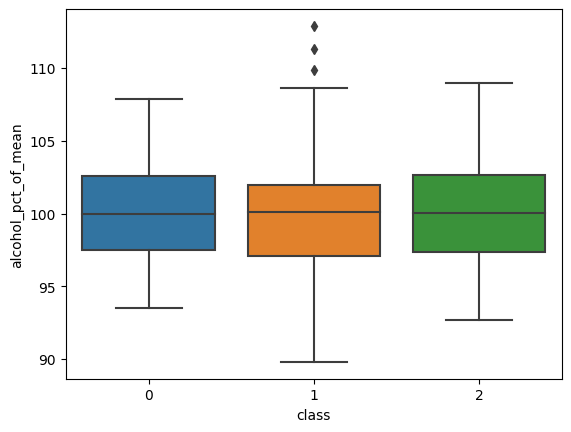

In [43]:
sns.boxplot(data=df, x='class', y='alcohol_pct_of_mean')

<Axes: xlabel='alcohol_pct_of_mean', ylabel='Count'>

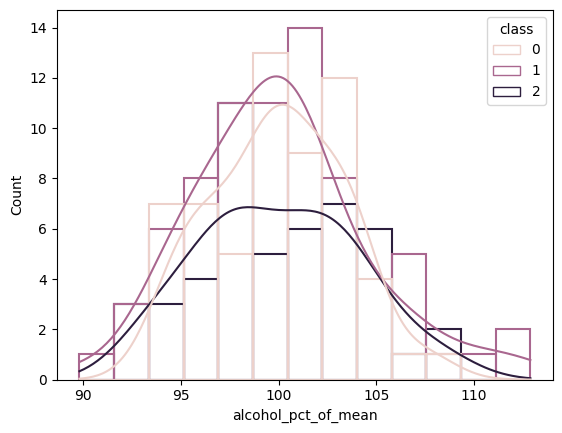

In [44]:
sns.histplot(data=df, x='alcohol_pct_of_mean', hue='class', common_norm=False, fill=False, kde=True)

<Axes: xlabel='alcohol_pct_of_mean', ylabel='Density'>

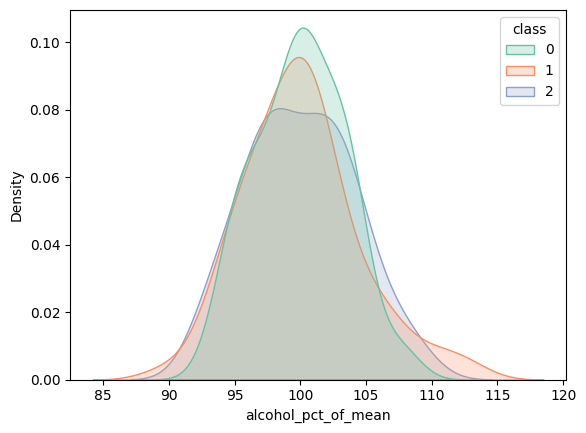

In [45]:
sns.kdeplot(data=df, x='alcohol_pct_of_mean', hue='class', common_norm=False,fill=True, palette='Set2')

In [46]:
df.groupby('class')[['alcohol']].mean()

,alcohol
class,
0,13.744746
1,12.278732
2,13.153750


In [47]:
df = pd.merge(
    df, 
    df.groupby('class')[['alcohol']].mean(),
    left_on='class',
    right_index=True,
    suffixes=["", "_group_mean_2"],
    how='left',
    validate='m:1',
)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,104.5,13.744746
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,96.3,13.744746


In [48]:
df.groupby('class')['magnesium'].transform(lambda x: x.max())

0      132.0
1      132.0
2      132.0
3      132.0
4      132.0
       ...  
173    123.0
174    123.0
175    123.0
176    123.0
177    123.0
Name: magnesium, Length: 178, dtype: float64

In [49]:
df['class_mean'] = df.groupby('class')['alcohol'].transform(np.mean) 
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746


Найдем процент содержания алкоголя от максимакльного в рамках группы.  
То есть $ \frac{\%\ алкоголя}{\%\ алкоголя\ макс.\ в\ рамках\ класса} $ 

In [50]:
df.groupby('class')['alcohol'].max() # возвращает по строке на каждую исходную строку

class
0    14.83
1    13.86
2    14.34
Name: alcohol, dtype: float64

In [51]:
df.groupby('class')['alcohol'].transform(np.max) # возвращает по строке на каждую исходную строку

0      14.83
1      14.83
2      14.83
3      14.83
4      14.83
       ...  
173    14.34
174    14.34
175    14.34
176    14.34
177    14.34
Name: alcohol, Length: 178, dtype: float64

In [52]:
df['max_group_alco'] = df.groupby('class')['alcohol'].transform(np.max)
df.sample(30)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0,13.744746,94.1,13.744746,13.744746,14.83
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0,2,13.153750,101.9,13.153750,13.153750,14.34
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0,0,13.744746,102.6,13.744746,13.744746,14.83
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,13.153750,100.9,13.153750,13.153750,14.34
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0,2,13.153750,104.1,13.153750,13.153750,14.34
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0,13.744746,93.5,13.744746,13.744746,14.83
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,0,13.744746,99.8,13.744746,13.744746,14.83
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1,12.278732,93.3,12.278732,12.278732,13.86
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520.0,2,13.153750,94.0,13.153750,13.153750,14.34
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0,0,13.744746,100.0,13.744746,13.744746,14.83


In [53]:
df['percent_alcohol'] = df['alcohol'] / df['max_group_alco']
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco,percent_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746,14.83,0.959541
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746,14.83,0.890088
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746,14.83,0.887390
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,104.5,13.744746,13.744746,14.83,0.968982
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,96.3,13.744746,13.744746,14.83,0.892785
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,13.744746,103.3,13.744746,13.744746,14.83,0.957519
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,104.7,13.744746,13.744746,14.83,0.970330
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,13.744746,102.3,13.744746,13.744746,14.83,0.948078
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,107.9,13.744746,13.744746,14.83,1.000000
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,13.744746,100.8,13.744746,13.744746,14.83,0.934592


In [54]:
df['percent_alcohol'] = df['alcohol'] / df.groupby('class')['alcohol'].transform(np.max)
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco,percent_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746,14.83,0.959541
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746,14.83,0.890088
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746,14.83,0.887390
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,104.5,13.744746,13.744746,14.83,0.968982
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,96.3,13.744746,13.744746,14.83,0.892785
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,13.744746,103.3,13.744746,13.744746,14.83,0.957519
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,104.7,13.744746,13.744746,14.83,0.970330
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,13.744746,102.3,13.744746,13.744746,14.83,0.948078
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,107.9,13.744746,13.744746,14.83,1.000000
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,13.744746,100.8,13.744746,13.744746,14.83,0.934592


* apply
* agg
* transform

### `.rank()`

In [55]:
df['rank_alcohol'] = df.groupby('class')['alcohol'].rank(ascending=False)
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco,percent_alcohol,rank_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,...,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746,14.83,0.959541,8.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,...,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746,14.83,0.890088,51.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,...,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746,14.83,0.887390,52.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,...,3.45,1480.0,0,13.744746,104.5,13.744746,13.744746,14.83,0.968982,6.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,...,2.93,735.0,0,13.744746,96.3,13.744746,13.744746,14.83,0.892785,49.5


In [56]:
df.sort_values(by='alcohol', ascending=False)[['class', 'alcohol', 'rank_alcohol']].head(10)

,class,alcohol,rank_alcohol
8,0,14.83,1.0
13,0,14.75,2.0
6,0,14.39,3.0
46,0,14.38,4.5
14,0,14.38,4.5
3,0,14.37,6.0
158,2,14.34,1.0
16,0,14.30,7.0
0,0,14.23,8.0
56,0,14.22,9.5


In [57]:
df.sort_values(by='rank_alcohol', ascending=True)[['class', 'alcohol', 'rank_alcohol']].head(10)

,class,alcohol,rank_alcohol
71,1,13.86,1.0
158,2,14.34,1.0
8,0,14.83,1.0
172,2,14.16,2.0
13,0,14.75,2.0
62,1,13.67,2.0
177,2,14.13,3.0
72,1,13.49,3.0
6,0,14.39,3.0
68,1,13.34,4.0


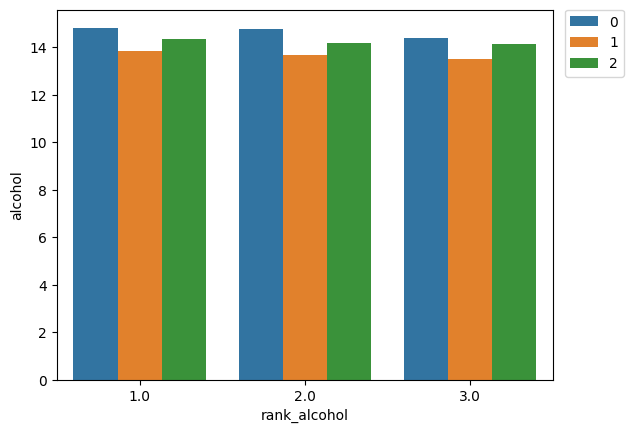

In [58]:
sns.barplot(data=df[df['rank_alcohol'] <= 3], x='rank_alcohol', hue='class', y='alcohol')
plt.legend(bbox_to_anchor=(1.01, 1.02))

## Фильтрация

In [59]:
df.shape

(178, 21)

In [60]:
df_2 = df.groupby('class').filter(lambda x: x['color_intensity'].mean() > 5 )
df_2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco,percent_alcohol,rank_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,...,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746,14.83,0.959541,8.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,...,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746,14.83,0.890088,51.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,...,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746,14.83,0.887390,52.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,...,3.45,1480.0,0,13.744746,104.5,13.744746,13.744746,14.83,0.968982,6.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,...,2.93,735.0,0,13.744746,96.3,13.744746,13.744746,14.83,0.892785,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,...,1.74,740.0,2,13.153750,104.2,13.153750,13.153750,14.34,0.956067,8.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,...,1.56,750.0,2,13.153750,101.9,13.153750,13.153750,14.34,0.934449,17.5
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,...,1.56,835.0,2,13.153750,100.9,13.153750,13.153750,14.34,0.925384,21.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,...,1.62,840.0,2,13.153750,100.1,13.153750,13.153750,14.34,0.918410,23.5


In [61]:
df_2['class'].unique()

array([0, 2])

In [62]:
df.groupby('class')['color_intensity'].mean()

class
0    5.528305
1    3.086620
2    7.396250
Name: color_intensity, dtype: float64

In [63]:
(df_2 != df[df.groupby('class')['color_intensity'].transform('mean') > 5]).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
alcohol_group_mean              0
alcohol_pct_of_mean             0
alcohol_group_mean_2            0
class_mean                      0
max_group_alco                  0
percent_alcohol                 0
rank_alcohol                    0
dtype: int64

In [64]:
df_3 = df.groupby('class')["color_intensity"].filter(lambda x: x.mean() > 7)
df_3

130     4.100000
131     5.400000
132     5.700000
133     5.000000
134     5.450000
135     7.100000
136     3.850000
137     5.000000
138     5.700000
139     4.920000
140     4.600000
141     5.600000
142     4.350000
143     4.400000
144     8.210000
145     4.000000
146     4.900000
147     7.650000
148     8.420000
149     9.400000
150     8.600000
151    10.800000
152     7.100000
153    10.520000
154     7.600000
155     7.900000
156     9.010000
157     7.500000
158    13.000000
159    11.750000
160     7.650000
161     5.880000
162     5.580000
163     5.280000
164     9.580000
165     6.620000
166    10.680000
167    10.260000
168     8.660000
169     8.500000
170     5.500000
171     9.899999
172     9.700000
173     7.700000
174     7.300000
175    10.200000
176     9.300000
177     9.200000
Name: color_intensity, dtype: float64

In [65]:
df_3 = df.groupby('class').filter(lambda x: x['color_intensity'].mean() > 7)
df_3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco,percent_alcohol,rank_alcohol
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.100000,...,1.29,630.0,2,13.15375,97.8,13.15375,13.15375,14.34,0.896792,32.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.400000,...,1.42,530.0,2,13.15375,97.9,13.15375,13.15375,14.34,0.898187,30.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.700000,...,1.36,560.0,2,13.15375,97.4,13.15375,13.15375,14.34,0.893305,36.0
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.000000,...,1.29,600.0,2,13.15375,96.6,13.15375,13.15375,14.34,0.885635,39.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.450000,...,1.51,650.0,2,13.15375,95.1,13.15375,13.15375,14.34,0.872385,43.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,...,1.58,695.0,2,13.15375,95.8,13.15375,13.15375,14.34,0.878661,40.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.850000,...,1.27,720.0,2,13.15375,93.1,13.15375,13.15375,14.34,0.854254,46.5
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.000000,...,1.69,515.0,2,13.15375,95.3,13.15375,13.15375,14.34,0.873780,42.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.700000,...,1.82,580.0,2,13.15375,102.6,13.15375,13.15375,14.34,0.940725,14.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.920000,...,2.15,590.0,2,13.15375,97.6,13.15375,13.15375,14.34,0.895397,34.0


In [66]:
# k-ая порядковая статистика
df.groupby('class')['alcohol'].nlargest(3)

class     
0      8      14.83
       13     14.75
       6      14.39
1      71     13.86
       62     13.67
       72     13.49
2      158    14.34
       172    14.16
       177    14.13
Name: alcohol, dtype: float64

# ПРАКТИКА

In [67]:
import seaborn as sns

In [68]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [69]:
# посчитайте число машин (записей) для каждого origin
#1 
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [70]:
#2 
# df.groupby('origin').count()
df.groupby('origin')['origin'].count()

origin
europe     70
japan      79
usa       249
Name: origin, dtype: int64

In [71]:
# найдите среднее значение horsepower для каждого origin
df.groupby('origin')['horsepower'].mean().round(2)

origin
europe     80.56
japan      79.84
usa       119.05
Name: horsepower, dtype: float64

In [72]:
# определите топ-5 model_year по числу машин (записей) # nlargest
df['model_year'].value_counts().nlargest(5).to_frame()

,model_year
73,40
78,36
76,34
82,31
75,30


In [73]:
# %%timeit
# определите квантили уровня 0.1, 0.5, 0.9 для displacement для каждого числа цилиндров

df.groupby('cylinders')['displacement'].agg(
    q1 = lambda x: x.quantile(0.1),
    q5 = lambda x: x.quantile(0.5),
    q9 = lambda x: x.quantile(0.9)
)
# 35.6 ms ± 5.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

,q1,q5,q9
cylinders,,,
3,70.0,70.0,77.0
4,85.0,105.0,140.0
5,123.0,131.0,172.6
6,168.0,228.0,250.0
8,302.0,350.0,400.0


In [74]:
# %%timeit
(
    df.groupby('cylinders')['displacement']
    .apply(lambda x: x.quantile([0.1, 0.5, 0.9]))
    .reset_index()
    .rename(columns={'level_1':'Quantile'})
    .pivot(columns='Quantile', index='cylinders', values='displacement')
)
# 20.9 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Quantile,0.1,0.5,0.9
cylinders,,,
3,70.0,70.0,77.0
4,85.0,105.0,140.0
5,123.0,131.0,172.6
6,168.0,228.0,250.0
8,302.0,350.0,400.0


In [75]:
# разбейте машины на 3 категории: число лошадиных сил до 80, 80-140, 140+ #
# Проще всего воспользоваться pd.cut
# (можно воспользоваться np.select или np.where)
# посчитайте число машин в каждой группе
pd.cut(df['horsepower'], [0, 80, 140, np.inf]).value_counts().sort_index().to_frame()

,horsepower
"(0.0, 80.0]",119
"(80.0, 140.0]",196
"(140.0, inf]",77


In [76]:
df['horsepower_cohort'] = pd.cut(df['horsepower'], [0, 80, 140, np.inf])
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,horsepower_cohort
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,"(80.0, 140.0]"


In [77]:
# разбейте машины на 3 категории: число лошадиных сил до 80, 80-140, 140+ #
# посчитайте медианные массу, число лошадиных сил и ускорение (acceleration)
df.groupby('horsepower_cohort')[['weight', 'horsepower', 'acceleration']].median()

,weight,horsepower,acceleration
horsepower_cohort,,,
"(0.0, 80.0]",2110.0,70.0,17.0
"(80.0, 140.0]",2902.5,97.0,15.5
"(140.0, inf]",4257.0,160.0,12.5


# resample

In [81]:
import yfinance as yf 

In [88]:
start_date = '2007-01-01' # начало периода
end_date = '2023-12-09'  # конец периода
ticker = 'GOOGL MSFT AAPL AMZN'

data = yf.download(ticker, start_date, end_date)
data.head(2)

[*********************100%%**********************]  4 of 4 completed


Adj Close                                  Close                    \
                AAPL   AMZN      GOOGL       MSFT      AAPL   AMZN      GOOGL   
Date                                                                            
2007-01-03  2.536984  1.935  11.701451  21.436998  2.992857  1.935  11.701451   
2007-01-04  2.593295  1.945  12.093594  21.401098  3.059286  1.945  12.093594   

                           High         ...        Low                 Open  \
                 MSFT      AAPL   AMZN  ...      GOOGL       MSFT      AAPL   
Date                                    ...                                   
2007-01-03  29.860001  3.092143  1.953  ...  11.539289  29.400000  3.081786   
2007-01-04  29.809999  3.069643  1.957  ...  11.720470  29.440001  3.001786   

                                              Volume                        \
              AMZN      GOOGL       MSFT        AAPL       AMZN      GOOGL   
Date                                                                         
2007-01-03  1.9340  11.661662  29.910000  1238319600  248102000  307951740   
2007-01-04  1.9295  11.736737  29.700001   847260400  126368000  315188496   

                      
                MSFT  
Date                  
2007-01-03  76935100  
2007-01-04  45774500  

[2 rows x 24 columns]

In [89]:
data.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume', 'GOOGL'),
            (   'Volume',  'MSFT')],
           )

In [91]:
data_unstacked = data.unstack().reset_index() # сделаем unstack
data_unstacked.columns = ['val_type', 'company', 'Date', 'value']
data_unstacked.head()

,val_type,company,Date,value
0,Adj Close,AAPL,2007-01-03,2.536984
1,Adj Close,AAPL,2007-01-04,2.593295
2,Adj Close,AAPL,2007-01-05,2.574827
3,Adj Close,AAPL,2007-01-08,2.587543
4,Adj Close,AAPL,2007-01-09,2.802490


In [92]:
data_unstacked.tail(3)

,val_type,company,Date,value
102333,Volume,MSFT,2023-12-06,21182100.0
102334,Volume,MSFT,2023-12-07,23118900.0
102335,Volume,MSFT,2023-12-08,20144800.0


In [85]:
# data_unstacked.to_csv('data_unstacked_yfinance.tsv', sep='\t', index=False, encoding='utf8')

### datetime колонки
коротко тут
https://www.marsja.se/pandas-convert-column-to-datetime/

In [ ]:
# data_unstacked.read_csv("./data_unstacked_yfinance.tsv", sep='\t', encoding='utf8')

In [100]:
df = data_unstacked[data_unstacked.val_type == 'Adj Close'].pivot(index='Date', values='value', columns='company')
df.head()

company,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-03,2.536984,1.9350,11.701451,21.436998
2007-01-04,2.593295,1.9450,12.093594,21.401098
2007-01-05,2.574827,1.9185,12.191942,21.279049
2007-01-08,2.587543,1.8750,12.101602,21.487249
2007-01-09,2.802490,1.8890,12.149650,21.508783


In [101]:
df.dtypes # какие типы данных

company
AAPL     float64
AMZN     float64
GOOGL    float64
MSFT     float64
dtype: object

In [102]:
df.index # 

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17',
               ...
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-04', '2023-12-05', '2023-12-06',
               '2023-12-07', '2023-12-08'],
              dtype='datetime64[ns]', name='Date', length=4264, freq=None)

In [103]:
df = df.reset_index()
df['Date'] = df['Date'].astype('object')
df.dtypes

company
Date      object
AAPL     float64
AMZN     float64
GOOGL    float64
MSFT     float64
dtype: object

In [106]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.dtypes

company
Date     datetime64[ns]
AAPL            float64
AMZN            float64
GOOGL           float64
MSFT            float64
dtype: object

In [107]:
df.head(2)

company,Date,AAPL,AMZN,GOOGL,MSFT
0,2007-01-03,2.536984,1.935,11.701451,21.436998
1,2007-01-04,2.593295,1.945,12.093594,21.401098


In [108]:
df['Date'].dt.year # год

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
4259    2023
4260    2023
4261    2023
4262    2023
4263    2023
Name: Date, Length: 4264, dtype: int64

In [109]:
df['Date'].dt.month # месяц

0        1
1        1
2        1
3        1
4        1
        ..
4259    12
4260    12
4261    12
4262    12
4263    12
Name: Date, Length: 4264, dtype: int64

In [110]:
df['Date'].dt.day # день

0       3
1       4
2       5
3       8
4       9
       ..
4259    4
4260    5
4261    6
4262    7
4263    8
Name: Date, Length: 4264, dtype: int64

In [112]:
df['Date'].dt.weekday # день недели :) очень важная штука

0       2
1       3
2       4
3       0
4       1
       ..
4259    0
4260    1
4261    2
4262    3
4263    4
Name: Date, Length: 4264, dtype: int64

In [113]:
df['Date'].dt.weekday.unique() # почему только 5 дней?

array([2, 3, 4, 0, 1], dtype=int64)

In [114]:
# resample -- перевод в другую частоту (были дни, стали недели, месяцы и тд.)
# данные агрегируются
df = df.set_index('Date') # вернем обратно
df.shape

(4264, 4)

In [115]:
df.head()

company,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-03,2.536984,1.9350,11.701451,21.436998
2007-01-04,2.593295,1.9450,12.093594,21.401098
2007-01-05,2.574827,1.9185,12.191942,21.279049
2007-01-08,2.587543,1.8750,12.101602,21.487249
2007-01-09,2.802490,1.8890,12.149650,21.508783


In [116]:
df_month = df.resample('M').max() # тот же датафрейм, но сагрегирован по месяцу
# подробнее тут https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
df_month.shape

(204, 4)

In [117]:
df_month.head()

company,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-31,2.939632,1.9450,12.637638,22.406187
2007-02-28,2.709851,2.0755,12.055806,21.939535
2007-03-31,2.901789,1.9905,11.636637,20.545979
2007-04-30,3.025006,3.1390,12.074074,21.698627
2007-05-31,3.668940,3.4930,12.477477,22.484440


In [126]:
df_week = df.resample('W').mean() # тот же датафрейм, но сагрегирован по неделе # подробнее тут
df_week = df_week.reset_index()
df_week

company,Date,AAPL,AMZN,GOOGL,MSFT
0,2007-01-07,2.568369,1.932833,11.995662,21.372382
1,2007-01-14,2.818293,1.880300,12.328629,21.747136
2,2007-01-21,2.797494,1.881750,12.382007,22.321824
3,2007-01-28,2.608553,1.845700,12.226677,22.054405
4,2007-02-04,2.583668,1.882400,12.269970,21.913694
...,...,...,...,...,...
879,2023-11-12,182.358865,141.738004,131.178000,361.390509
880,2023-11-19,187.930002,143.919998,134.513995,370.229456
881,2023-11-26,190.842499,145.870003,137.100002,376.447502
882,2023-12-03,190.149997,146.839999,134.598001,378.716003


In [127]:
# .dt позволяет применять к датам то же, что умеет библиотека datetime
# https://docs.python.org/3/library/datetime.html
# strftime -- форматирование даты в нужный вид
df_week['Date'].dt.strftime('%d.%m.%Y') # метод strftime форматирует datetime в строку #метод strptime парсит строку и возвращает дату

0      07.01.2007
1      14.01.2007
2      21.01.2007
3      28.01.2007
4      04.02.2007
          ...    
879    12.11.2023
880    19.11.2023
881    26.11.2023
882    03.12.2023
883    10.12.2023
Name: Date, Length: 884, dtype: object

In [128]:
df_week['Date2'] = df_week['Date'].dt.strftime('%m/%d/%Y')
df_week.dtypes # видим, что Date2 -- object, т.е. строка

company
Date     datetime64[ns]
AAPL            float64
AMZN            float64
GOOGL           float64
MSFT            float64
Date2            object
dtype: object

In [130]:
df_week.head()

company,Date,AAPL,AMZN,GOOGL,MSFT,Date2
0,2007-01-07,2.568369,1.932833,11.995662,21.372382,01/07/2007
1,2007-01-14,2.818293,1.880300,12.328629,21.747136,01/14/2007
2,2007-01-21,2.797494,1.881750,12.382007,22.321824,01/21/2007
3,2007-01-28,2.608553,1.845700,12.226677,22.054405,01/28/2007
4,2007-02-04,2.583668,1.882400,12.269970,21.913694,02/04/2007


In [131]:
df_week_filtered = df_week[(df_week['Date'].dt.year >= 2019) & (df_week['Date'].dt.year <= 2023)]
df_week_filtered

company,Date,AAPL,AMZN,GOOGL,MSFT,Date2
626,2019-01-06,36.359432,76.459625,52.539750,95.439257,01/06/2019
627,2019-01-13,36.380669,82.422900,53.862401,97.909166,01/13/2019
628,2019-01-20,36.985833,83.649699,54.339500,99.948901,01/20/2019
629,2019-01-27,37.053499,82.471125,54.356875,101.075125,01/27/2019
630,2019-02-03,38.833470,82.471600,54.924200,99.063882,02/03/2019
...,...,...,...,...,...,...
879,2023-11-12,182.358865,141.738004,131.178000,361.390509,11/12/2023
880,2023-11-19,187.930002,143.919998,134.513995,370.229456,11/19/2023
881,2023-11-26,190.842499,145.870003,137.100002,376.447502,11/26/2023
882,2023-12-03,190.149997,146.839999,134.598001,378.716003,12/03/2023


In [134]:
df_week_filtered.set_index('Date')[['AAPL', 'AMZN', 'GOOGL', 'MSFT']].head(2)

company,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-01-06,36.359432,76.459625,52.539750,95.439257
2019-01-13,36.380669,82.422900,53.862401,97.909166


<Axes: xlabel='Date'>

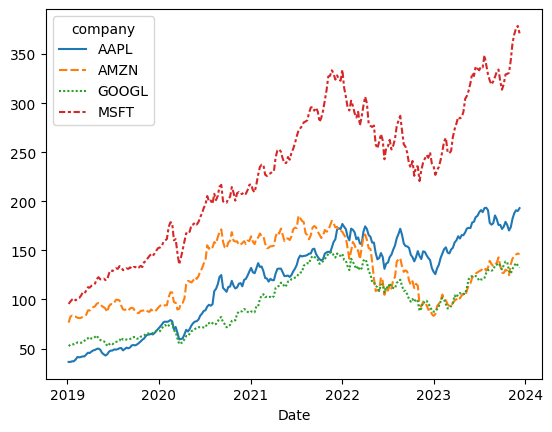

In [133]:
sns.lineplot(df_week_filtered.set_index('Date')[['AAPL', 'AMZN', 'GOOGL', 'MSFT']])

In [139]:
df_week_filtered[['Date', 'AAPL', 'AMZN', 'GOOGL', 'MSFT']].melt(id_vars='Date').head()

,Date,company,value
0,2019-01-06,AAPL,36.359432
1,2019-01-13,AAPL,36.380669
2,2019-01-20,AAPL,36.985833
3,2019-01-27,AAPL,37.053499
4,2019-02-03,AAPL,38.833470


<Axes: xlabel='Date', ylabel='value'>

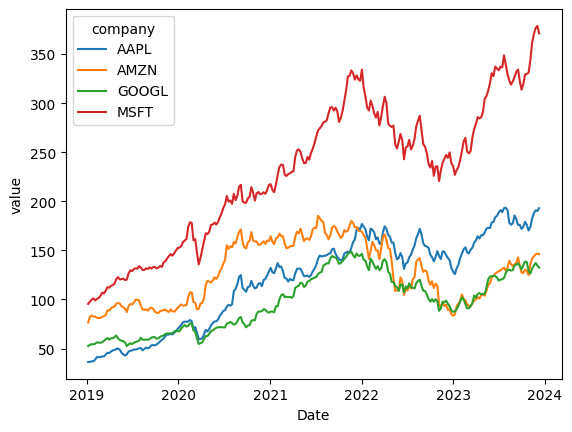

In [141]:
sns.lineplot(
    df_week_filtered[['Date', 'AAPL', 'AMZN', 'GOOGL', 'MSFT']].melt(id_vars='Date'),
    x='Date',
    y='value',
    hue='company'
)

## rolling

In [161]:
AAPL = df[['AAPL']]
AAPL.head()

company,AAPL
Date,
2007-01-03,2.536984
2007-01-04,2.593295
2007-01-05,2.574827
2007-01-08,2.587543
2007-01-09,2.802490


In [162]:
AAPL.rolling(
    window=5,
    min_periods=3,
).mean()

company,AAPL
Date,
2007-01-03,NaN
2007-01-04,NaN
2007-01-05,2.568369
2007-01-08,2.573162
2007-01-09,2.619028
...,...
2023-12-04,190.077997
2023-12-05,190.681998
2023-12-06,191.272000


In [163]:
AAPL = AAPL.join(
    AAPL.rolling(
        window=10,
        min_periods=7,
    ).mean(),
    rsuffix='_MA'
)
AAPL.head()

company,AAPL,AAPL_MA
Date,,
2007-01-03,2.536984,NaN
2007-01-04,2.593295,NaN
2007-01-05,2.574827,NaN
2007-01-08,2.587543,NaN
2007-01-09,2.802490,NaN


(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01')])

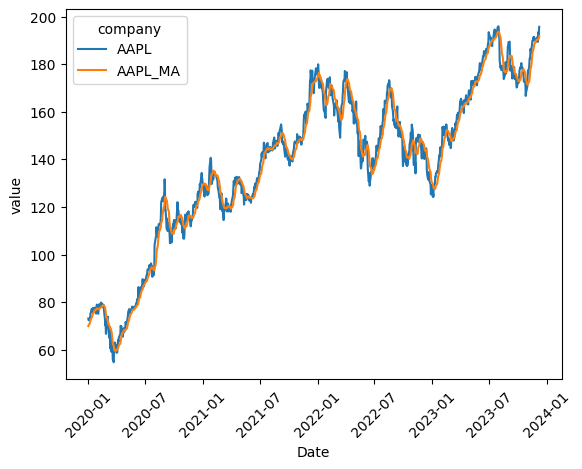

In [165]:
sns.lineplot(
    AAPL[(AAPL.index.year >= 2020) & (AAPL.index.year <= 2023)].reset_index().melt(id_vars='Date'),
    x='Date',
    y='value',
    hue='company'
)
plt.xticks(rotation=45)
;

## shift

In [168]:
df_new = df[df.index.year > 2020]
df_new

company,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2021-01-04,127.164162,159.331497,86.306503,211.996597
2021-01-05,128.736359,160.925507,87.002502,212.201126
2021-01-06,124.402931,156.919006,86.143997,206.698883
2021-01-07,128.647919,158.108002,88.717003,212.580887
2021-01-08,129.758347,159.134995,89.891502,213.876129
...,...,...,...,...
2023-12-04,189.429993,144.839996,129.270004,369.140015
2023-12-05,193.419998,146.880005,130.990005,372.519989
2023-12-06,192.320007,144.520004,130.020004,368.799988


<Axes: xlabel='Date'>

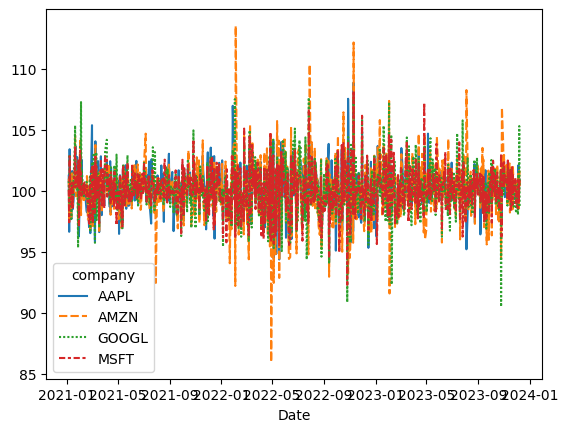

In [175]:
sns.lineplot((df_new / df_new.shift(1)) * 100)

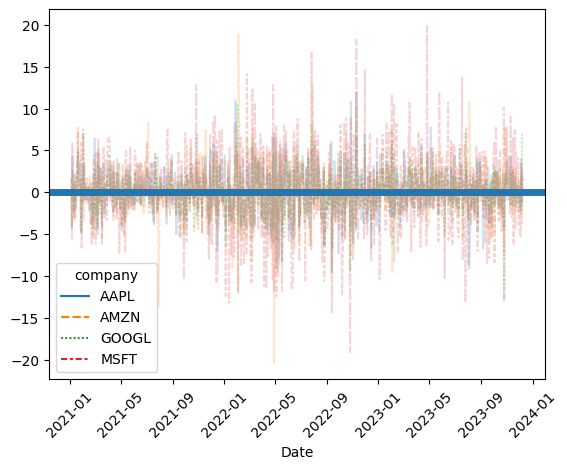

In [178]:
sns.lineplot((df_new - df_new.shift(1)), alpha=0.2)
plt.axhline(0, linewidth=5)
plt.xticks(rotation=45)
plt.show()

In [76]:
# resample и groupby вместе
# https://www.statology.org/pandas-groupby-resample/